In [22]:
import pandas as pd
import numpy as np


In [23]:
#Stage1 -> Selection of DATA
df = pd.read_csv("D:\\hackveda\\LinearRegression\\Grade_Set_1.csv")

In [24]:
df

,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


In [25]:
#Stage2 -> Selection
#1. Dependent Variable(y)
#2. Independent Cariable (x)
# InDependent Variables are those variables those can be measured directly eg ( hours studied  )
# dependent Variables are those variables those values which are dependent on some other factor eg ( Grade )

import matplotlib.pyplot as plt
%matplotlib inline

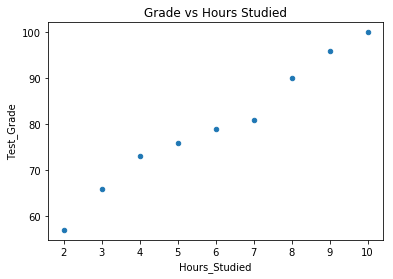

In [26]:
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')


In [27]:
# check the correlation between variables
# correlation is the linear relation between X and Y. The value of Correlation is always from 1 to -1 
#1 means highly corelated and -1 means if x is increasing y is decreasing and if correaltion is 0 it means there isnt any
#       relation between the two variables
# To check relation of independent variable w.r.t dependent variable
print (df.corr())

               Hours_Studied  Test_Grade
Hours_Studied       1.000000    0.987797
Test_Grade          0.987797    1.000000


In [28]:
# Stage 3 Preprocessing of Data 

# check whether there is empty fields
# is null is used to check whether there are empty fields or not if there are empty fields it will show TRUE
df.isnull()

,Hours_Studied,Test_Grade,Status,Result
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False


In [29]:
# remove missing values
df = df.dropna()
df


,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 4 columns):
Hours_Studied    9 non-null int64
Test_Grade       9 non-null int64
Status           9 non-null object
Result           9 non-null object
dtypes: int64(2), object(2)
memory usage: 360.0+ bytes


In [31]:
import sklearn.preprocessing as pp


In [32]:
# Conversion - Category -> Numeric
# Label Binarizer --> Category to Numeric 
# Label Binarizer converts True and Fasle values to 0 and 1 
lb = pp.LabelBinarizer()
print("before conversion\n\n", df)

before conversion

    Hours_Studied  Test_Grade Status Result
0              2          57   fail      D
1              3          66   fail      D
2              4          73   pass      C
3              5          76   pass      C
4              6          79   pass      C
5              7          81   pass      B
6              8          90   pass      B
7              9          96   pass      A
8             10         100   pass      A


In [33]:
df.Status = lb.fit_transform(df.Status)
df

,Hours_Studied,Test_Grade,Status,Result
0,2,57,0,D
1,3,66,0,D
2,4,73,1,C
3,5,76,1,C
4,6,79,1,C
5,7,81,1,B
6,8,90,1,B
7,9,96,1,A
8,10,100,1,A


In [34]:
# Stage 4 - Transformation 
# Change scale of multiple variable to a same range (0 - 1)
#Process: Normalization -> Min-Max Scaling
#Test_Grade = 57(0) <-> 100(1)
#Formula: Xnorm = (X - Xmin) / (Xmax - Xmin)
#Xnorm = 57 - 57 / 100 - 57 = 0
#Xnorm = 100 - 57 / 100 - 57 = 1

# Select the independent and dependent

# Select dependent variable  its always in 1d array 
Y = df.Test_Grade.values # series -> 1D array

Y

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100], dtype=int64)

In [35]:
#select independent variable its always in 2d array
# newaxis object can be used in all slicing operations to change an axis of length one
X = df.Hours_Studied[:, np.newaxis]
X

array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [36]:
#Transformation 
# Normalization using Min Max scaling 
Xmin = X.min()
print("X min", Xmin)
Xmax = X.max()
print("X max", Xmax)
Xnorm = (X - Xmin) / (Xmax - Xmin)
Xnorm

X min 2
X max 10


array([[ 0.   ],
       [ 0.125],
       [ 0.25 ],
       [ 0.375],
       [ 0.5  ],
       [ 0.625],
       [ 0.75 ],
       [ 0.875],
       [ 1.   ]])

In [37]:

print("Y min", Y.min())
print("Y max", Y.max())
Ynorm = (Y - Y.min()) / (Y.max() - Y.min())
Ynorm

Y min 57
Y max 100


array([ 0.        ,  0.20930233,  0.37209302,  0.44186047,  0.51162791,
        0.55813953,  0.76744186,  0.90697674,  1.        ])

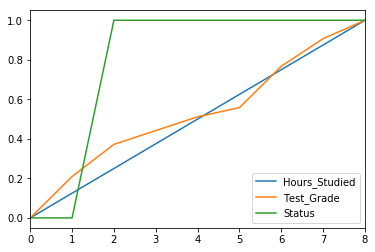

In [38]:
# Put the norm values to dataframe
df2 = df
df2.Hours_Studied = Xnorm
df2.Test_Grade = Ynorm
# Plot a graph for understanding data
df2.plot()

In [1]:
# Stage 5 - Mining
# predict (Y) Test_Grade on the  basis of (X) Hours_Studied with maximum  accuracy or greater than 0.8 (80%) """
#Using Regression """
# regression equation = Y = m*X + c 
#m = coefficient (slope) 
 #   (change in Y w.r.t X)
#c = intercept (Value of Y when X = 0)

In [41]:
import sklearn.linear_model as lm
lr = lm.LinearRegression()

lr.fit(X, Y) # Training the model/equation

# Predict the values of marks on the basis of study hours

hrs = int(input("Enter study hours: "))
marks = lr.predict(hrs)
print("Student who study for ",hrs," hours, will score ", marks, " marks.")

Enter study hours: 7
Student who study for  7  hours, will score  [ 84.79444444]  marks.


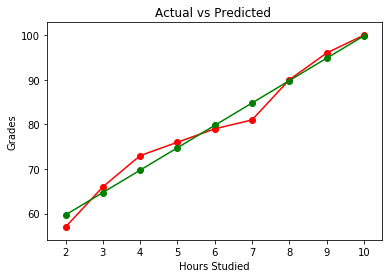

In [47]:
# Plot -->  Actual vs predicted
# plot actual marks vs hours
plt.plot(X, Y, color="red")
plt.scatter(X, Y, color="red")
plt.xlabel("Hours Studied")
plt.ylabel("Grades")
plt.title("Actual vs Predicted ")
# Plot the predicted values for same hours data
plt.plot(X, lr.predict(X), color="green")
plt.scatter(X, lr.predict(X), color="green")


In [43]:
# Evaluation of model using metrics 
# 1.) Accuracy using R2 Score [0 - 1]
# 2.) Error Score = Min the error better the model
 #   - Mean Absolute Error
 #   - Root Mean Squared Error     

from sklearn.metrics import r2_score
accuracy = r2_score(Y, lr.predict(X))
print("Accuracy is", accuracy)
 
# Errors: 0 - n 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y, lr.predict(X))
print("Mean absolute error", mae)

Accuracy is 0.97574310741
Mean absolute error 1.61851851852
